USING NN model to classify hand-writing digits dataset-MNIST

In [17]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tf.disable_v2_behavior()
from tensorflow.examples.tutorials.mnist import  input_data

In [18]:
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


dataet display

In [19]:
mnist.train.images, mnist.train.labels

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

In [20]:
images = mnist.train.images[:10]
labels = np.argmax(mnist.train.labels[:10], 1)
images.shape, labels.shape, np.max(images)

((10, 784), (10,), 1.0)

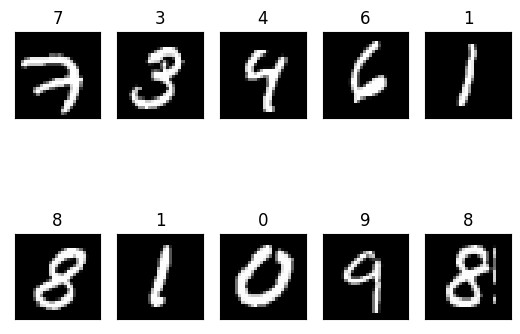

In [21]:
fig, axs = plt.subplots(2,5,sharex=False, sharey=False)
for i in range(2):
    for j in range(5):
        axs[i][j].imshow(images[i * 5 + j].reshape((28, 28)),cmap='gray')
        axs[i][j].set(title=labels[i * 5 + j])
        # axs[i][j].tick_params(axis='both',which='both')
        
        axs[i][j].set_xticks(())
        axs[i][j].set_yticks(())

In [22]:
images = mnist.train.images
images = images.reshape([-1, 28, 28])

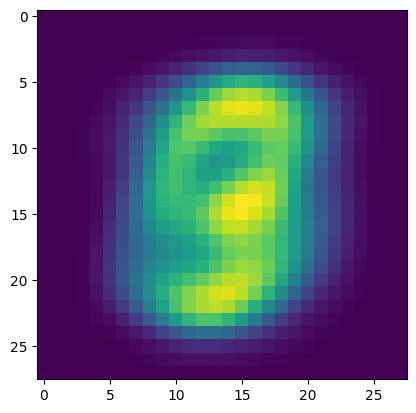

In [9]:
# show average image of this total dataset
ave_image = np.mean(images, axis=0)
ave_image.shape
plt.imshow(ave_image)

show average image of every class

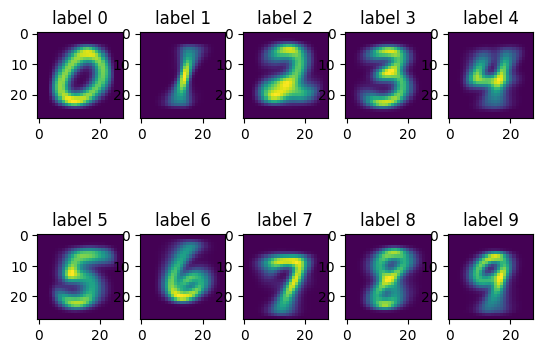

In [10]:
def show(label):
    idxs = (np.argmax(mnist.train.labels, axis=1) == label)
    selected_images = images[idxs]
    return np.mean(selected_images, axis=0)


fig,axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axs[i][j].imshow(show(i * 5 + j))
        axs[i][j].set(title=f'label {i * 5 + j}')
        

Display the statistics of different categories of images at each pixel point

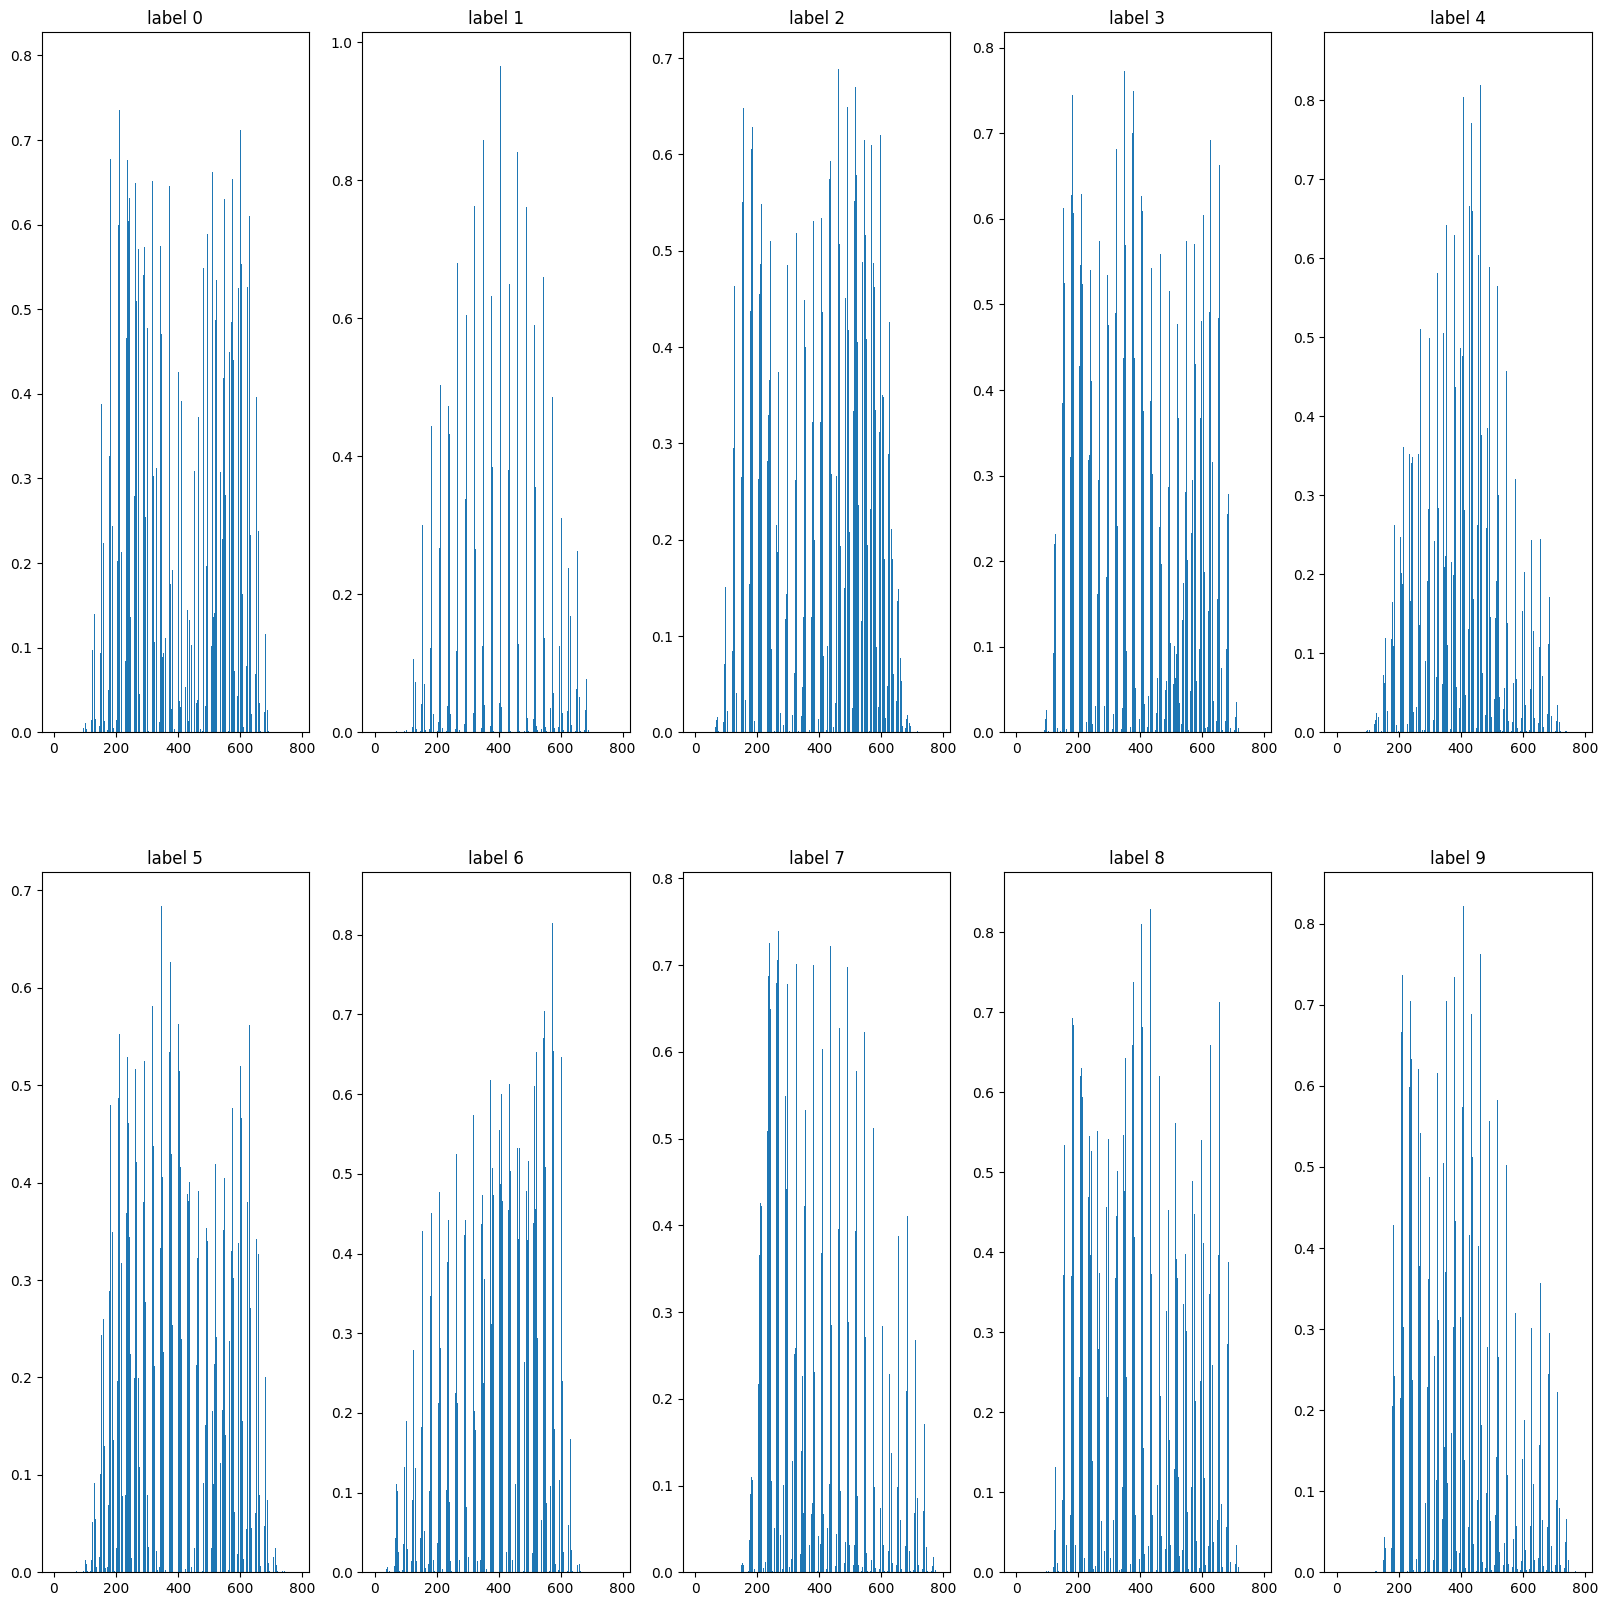

In [11]:

avgs = [show(i) for i in range(10)]
# fig,axs = plt.subplots(2, 5)
plt.figure(figsize=(20, 20))
for i in range(2):
    for j in range(5):
        plt.subplot(2,5, i * 5 + j + 1)
        plt.bar(list(range(28 * 28)), avgs[i * 5 + j].reshape([-1]))
        plt.title(f"label {i * 5 + j}")

define parameters of our model

In [12]:
# defin placeholder
xs = tf.placeholder(tf.float32,[None,784]) # 784 = 28X28
ys = tf.placeholder(tf.float32,[None,10]) # 10 = (0~9) one_hot

In [13]:
# defind weight and bias
Weights = tf.Variable(tf.random_normal([784,10]))
biases = tf.Variable(tf.zeros([1,10])+0.2)

In [14]:
# defind forward of model
y_pre = tf.nn.softmax(tf.matmul(xs,Weights) + biases) 

In [15]:
# defin loss function 
cross_entropy =tf.reduce_mean( -tf.reduce_sum(ys*tf.log(y_pre),reduction_indices=[1]))#compute cross_entropy

In [16]:
# define optimizer
train = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [91]:
init = tf.global_variables_initializer()


Training model

In [108]:
sess  = tf.Session()
sess.run(init)
for i in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    sess.run(train,feed_dict={xs:batch_xs,ys:batch_ys})
    if i %50==0:
        print(sess.run(cross_entropy,feed_dict={xs:batch_xs,ys:batch_ys}))

correct_prediction = tf.equal(tf.argmax(ys,1), tf.argmax(y_pre,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("test set accuracy: ", sess.run(accuracy, feed_dict={xs: mnist.test.images, ys: mnist.test.labels}))


13.077493
1.4262897
0.8950111
0.9046317
0.620188
0.82533264
0.8694886
0.8386316
0.7517142
0.5230396
0.49385113
0.6089854
0.67003024
1.1047531
0.70158905
0.31292588
0.31640935
0.8030146
0.36267468
0.5910051
test set accuracy:  0.8799
